In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Import cancer data from the Sklearn library.
#Dataset can also be found here


dataset = pd.read_csv('/home/inlab/Downloads/data extraction_0125_v1.csv')
result = ['Trustable','Non-Trustable']

In [2]:
dataset.head()

,# of Peers,Endorsing,MaxDelay,MinDelay,AvgDelay,TPS,IsTrustable
0,20,20,98,28,67.85,229,1
1,20,20,99,23,58.90,141,0
2,20,20,89,29,67.95,209,1
3,20,20,99,21,60.00,154,1
4,20,20,98,25,62.45,144,0


In [ ]:
sns.pairplot(dataset)

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(dataset.corr('pearson'), annot=True)
# There is a strong correlation between mean radius and mean perimeter as well as mean area and mean perimeter 

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(dataset.corr('kendall'), annot=True)
# There is a strong correlation between mean radius and mean perimeter as well as mean area and mean perimeter 

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(dataset.corr('spearman'), annot=True)
# There is a strong correlation between mean radius and mean perimeter as well as mean area and mean perimeter 

In [3]:
dataset.corr('pearson')

,# of Peers,Endorsing,MaxDelay,MinDelay,AvgDelay,TPS,IsTrustable
# of Peers,1.000000,1.000000,0.185710,-0.191541,0.845770,-0.232518,-0.234630
Endorsing,1.000000,1.000000,0.185710,-0.191541,0.845770,-0.232518,-0.234630
MaxDelay,0.185710,0.185710,1.000000,0.090402,0.284153,-0.031310,-0.132432
MinDelay,-0.191541,-0.191541,0.090402,1.000000,0.051230,0.072280,-0.051274
AvgDelay,0.845770,0.845770,0.284153,0.051230,1.000000,-0.155628,-0.246264
TPS,-0.232518,-0.232518,-0.031310,0.072280,-0.155628,1.000000,0.771155
IsTrustable,-0.234630,-0.234630,-0.132432,-0.051274,-0.246264,0.771155,1.000000


In [4]:
#y is the feature we are trying to predict
#X is the predictors which are the remaining columns(mean radius, mean texture,mean perimeter, mean area, mean smoothness etc)
#X = dataset.drop(['# of Peers','IsTrustable'], axis=1)#drop the targer feature and use all the remaining features in our datafile
X = dataset.drop(['# of Peers','Endorsing','MaxDelay','TPS','IsTrustable'], axis=1)
X.head()
#X1= dataset.drop(['# of Peers'], axis=1)

,MinDelay,AvgDelay
0,28,67.85
1,23,58.90
2,29,67.95
3,21,60.00
4,25,62.45


In [5]:
y = dataset['IsTrustable']
y.head()

0    1
1    0
2    1
3    1
4    0
Name: IsTrustable, dtype: int64

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(X.corr('pearson'), annot=True)

In [6]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=20)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
#X_train1= X_train.drop(['TPS'], axis=1)
#X_test1= X_test.drop(['TPS'], axis=1)

In [7]:
print('The size of the training "X" (input features) is', X_train.shape)
print('\n')
print('The size of our testing "X" (input features) is', X_test.shape)
print('\n')
print('The size of the training "y" (output features) is', y_train.shape)
print('\n')
print('The size of the training "y" (output features) is', y_test.shape)

The size of the training "X" (input features) is (140, 2)


The size of our testing "X" (input features) is (36, 2)


The size of the training "y" (output features) is (140,)


The size of the training "y" (output features) is (36,)


In [8]:
from sklearn.svm import SVC
svc_model = SVC(C=1.0, cache_size=200,class_weight=None, coef0=0.0,decision_function_shape='ovr',degree=3,gamma='auto',kernel='rbf',max_iter=-1,probability=False,random_state=None,shrinking=True,tol=0.001,verbose=False)

svc_model.fit(X_train, y_train)

SVC(gamma='auto')

In [9]:
y_predict = svc_model.predict(X_test)

In [10]:
#Import metric libraries
#This is to check the accuracy of the prediction by comparing it to the output we already have.
#Use the confusion matrix for this comparison
from sklearn.metrics import classification_report, confusion_matrix
cm = np.array(confusion_matrix(y_test,y_predict,labels=[1,0]))
confusion = pd.DataFrame(cm,index=['is_Trustable', 'is_notTrustable'],
                    columns=['predicted_Trustable','predicted_notTrustable'])
confusion


,predicted_Trustable,predicted_notTrustable
is_Trustable,21,4
is_notTrustable,9,2


<AxesSubplot:>

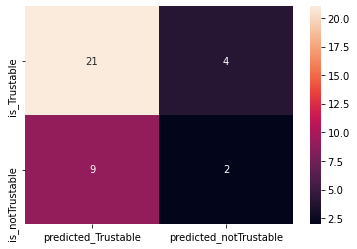

In [11]:
#Lets visualize the confusion matrix on the Heatmap
sns.heatmap(confusion,annot=True)

In [12]:
print(classification_report(y_test, y_predict))
#print("training set accuracy: {:.2f}".format(svc_model.score(X_train, y_train)))
#print("test set accuracy: {:.2f}".format(svc_model.score(X_test, y_test)))
#The accuracy is 90%

              precision    recall  f1-score   support

           0       0.33      0.18      0.24        11
           1       0.70      0.84      0.76        25

    accuracy                           0.64        36
   macro avg       0.52      0.51      0.50        36
weighted avg       0.59      0.64      0.60        36



In [13]:
#Improving the model
#first is to normalize the training data
X_train_min = X_train.min()
X_train_min

MinDelay    20.0
AvgDelay    37.6
dtype: float64

In [14]:
X_train_max = X_train.max()
X_train_max

MinDelay    45.0
AvgDelay    74.8
dtype: float64

In [15]:
X_train_range = (X_train_max-X_train_min)
X_train_range

MinDelay    25.0
AvgDelay    37.2
dtype: float64

In [16]:
X_train_scaled = (X_train - X_train_min)/(X_train_range)
X_train_scaled.head()

,MinDelay,AvgDelay
112,0.12,0.278226
122,0.60,0.432796
104,0.28,0.427419
4,0.20,0.668011
111,0.28,0.318548


In [17]:
#Train the SVM model with the scaled(Normalized)datasets
X_test_min = X_test.min()
X_test_range = (X_test - X_test_min).max()
X_test_scaled = (X_test - X_test_min)/X_test_range

In [49]:
#svc_model = SVC(C=100,gamma=10,cache_size=200,class_weight=None,decision_function_shape='ovr',kernel='rbf',max_iter=-1,probability=False,random_state=None,shrinking=True,tol=0.001,verbose=False)
svc_model = SVC(C=1000,gamma=1,kernel='rbf')
svc_model.fit(X_train_scaled, y_train)

SVC(C=1000, gamma=1)

In [50]:
y_predict = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test,y_predict)
cm = np.array(confusion_matrix(y_test,y_predict,labels=[1,0]))
confusion = pd.DataFrame(cm,index=['is_Trustable', 'is_notTrustable'],
                    columns=['predicted_Trustable','predicted_notTrustable'])
confusion


,predicted_Trustable,predicted_notTrustable
is_Trustable,21,4
is_notTrustable,9,2


<AxesSubplot:>

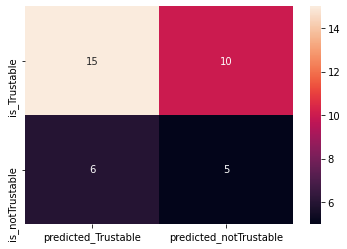

In [47]:
sns.heatmap(confusion,annot=True)

In [51]:
print(classification_report(y_test, y_predict))
print("training set accuracy: {:.2f}".format(svc_model.score(X_train, y_train)))
print("test set prediction accuracy: {:.2f}".format(svc_model.score(X_test, y_predict)))
print("test set accuracy: {:.2f}".format(svc_model.score(X_test, y_test)))

              precision    recall  f1-score   support

           0       0.33      0.18      0.24        11
           1       0.70      0.84      0.76        25

    accuracy                           0.64        36
   macro avg       0.52      0.51      0.50        36
weighted avg       0.59      0.64      0.60        36

training set accuracy: 0.60
test set prediction accuracy: 0.83
test set accuracy: 0.69


In [ ]:
#finaltest = pd.read_csv('/home/inlab/Documents/SVMrealtestdataset.csv')

print("Please enter the values")
NoofPeers = int(input("NoofPeers: "))
MaxDelay = float(input( "MaxDelay: "))
MinDelay = float(input( "MinDelay: "))
AvgDelay =float(input("AvgDelay: "))
new_input = [[NoofPeers,MaxDelay,MinDelay,AvgDelay]]  
predictions = svc_model.predict(new_input)
print(predictions)
if predictions == 1:
    print('Prediction: The input node set is Trustable node set')
else:
    print('Prediction: The input node set is Non-Trustable node set')



In [ ]:
features = ['# of Peers','MaxDelay','MinDelay','AvgDelay']

print("Please enter the values")
for feature in features:
    val = input(feature + ": ")
    predict[feature] = [float(val)]
    
predictions = svc_model.predict(dict(features))
for pred_dict in predictions:
    class_id = pred_dict['class_ids'][0]
    print('Prediction is "{}"'.format(result[class_id]))
    
